In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import tensorflow.keras.layers as layers
from tensorflow import keras

2024-06-29 11:52:20.666934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 11:52:20.667003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 11:52:20.716675: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-29 11:52:20.817164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-29 11:52:21.610761: W tensorflow/compiler/tf2

In [104]:
(train, test) = cifar10.load_data()
train_x = np.array(train[0])
train_y = np.array(train[1])
test_x = np.array(test[0])
test_y = np.array(test[1])

In [94]:
permute = [i for i in range(50000)]
np.random.shuffle(permute)

val_x = train_x[permute[40000:]]
val_y = tf.one_hot(train_y[permute[40000:]], 10)
val_y = val_y[:, 0]

train_x = train_x[permute[:40000]]
train_y = tf.one_hot(train_y[permute[:40000]], 10)
train_y = train_y[:, 0]

In [105]:
test_x = test_x
test_y = tf.one_hot(test_y, 10)
test_y = test_y[:, 0]

ship


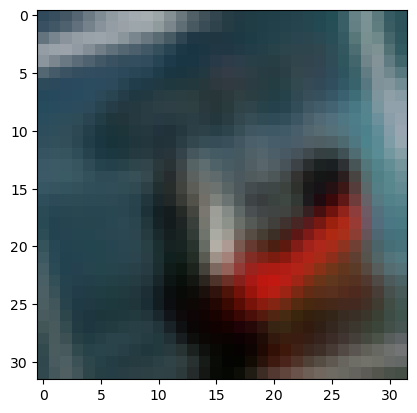

In [89]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
data_augmentation = keras.Sequential(
                        [
                        layers.RandomFlip("horizontal"),
                        layers.RandomRotation(0.05),
                        layers.RandomZoom(0.05),
                        layers.RandomBrightness(0.05),
                        layers.RandomContrast(0.05),
                        layers.RandomTranslation(0.05,0.05)
                        ]
)

i = np.random.randint(0, 10000)
plt.imshow(np.int16(data_augmentation(train_x[i])))
print(classes[np.argmax(train_y[i])])

In [90]:
data_augmentation = keras.Sequential(
                        [
                        layers.RandomFlip("horizontal"),
                        layers.RandomRotation(0.05),
                        layers.RandomZoom(0.1),
                        layers.RandomBrightness(0.05),
                        layers.RandomContrast(0.05),
                        layers.RandomTranslation(0.05,0.05)
                        ]
)

Inputs = layers.Input(shape=(32,32,3))

x = data_augmentation(Inputs)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)

x = layers.Conv2D(64, kernel_size=1, activation="relu", padding="same")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.1)(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
Outputs = layers.Dense(10, activation="softmax")(x)

CIFAR10 = keras.Model(Inputs, Outputs)

CIFAR10.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [91]:
CIFAR10.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 sequential_66 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
 batch_normalization_40 (Ba  (None, 32, 32, 3)         12        
 tchNormalization)                                               
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_41 (Ba  (None, 16, 16, 32)        128

In [92]:
# callbacks = [keras.callbacks.ModelCheckpoint("CIFAR10",save_best_only=True)]
# history = CIFAR10.fit(train_x, train_y, epochs=30, callbacks=callbacks, validation_data=(val_x,val_y))
history = CIFAR10.fit(train_x, train_y, epochs=100, validation_data=(val_x,val_y))

Epoch 1/100
1250/1250 [==============================] - 7s 4ms/step - loss: 1.5117 - accuracy: 0.4512 - val_loss: 1.4945 - val_accuracy: 0.5027
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2218 - accuracy: 0.5666 - val_loss: 1.3306 - val_accuracy: 0.5667
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0754 - accuracy: 0.6173 - val_loss: 1.2103 - val_accuracy: 0.6031
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9965 - accuracy: 0.6484 - val_loss: 1.0171 - val_accuracy: 0.6570
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9345 - accuracy: 0.6725 - val_loss: 1.0359 - val_accuracy: 0.6632
Epoch 6/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.8920 - accuracy: 0.6883 - val_loss: 0.8443 - val_accuracy: 0.7077
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8561 - accuracy: 0.7024 - val_loss: 0.9090 - val_ac

KeyboardInterrupt: 

Accuracy: 0.86


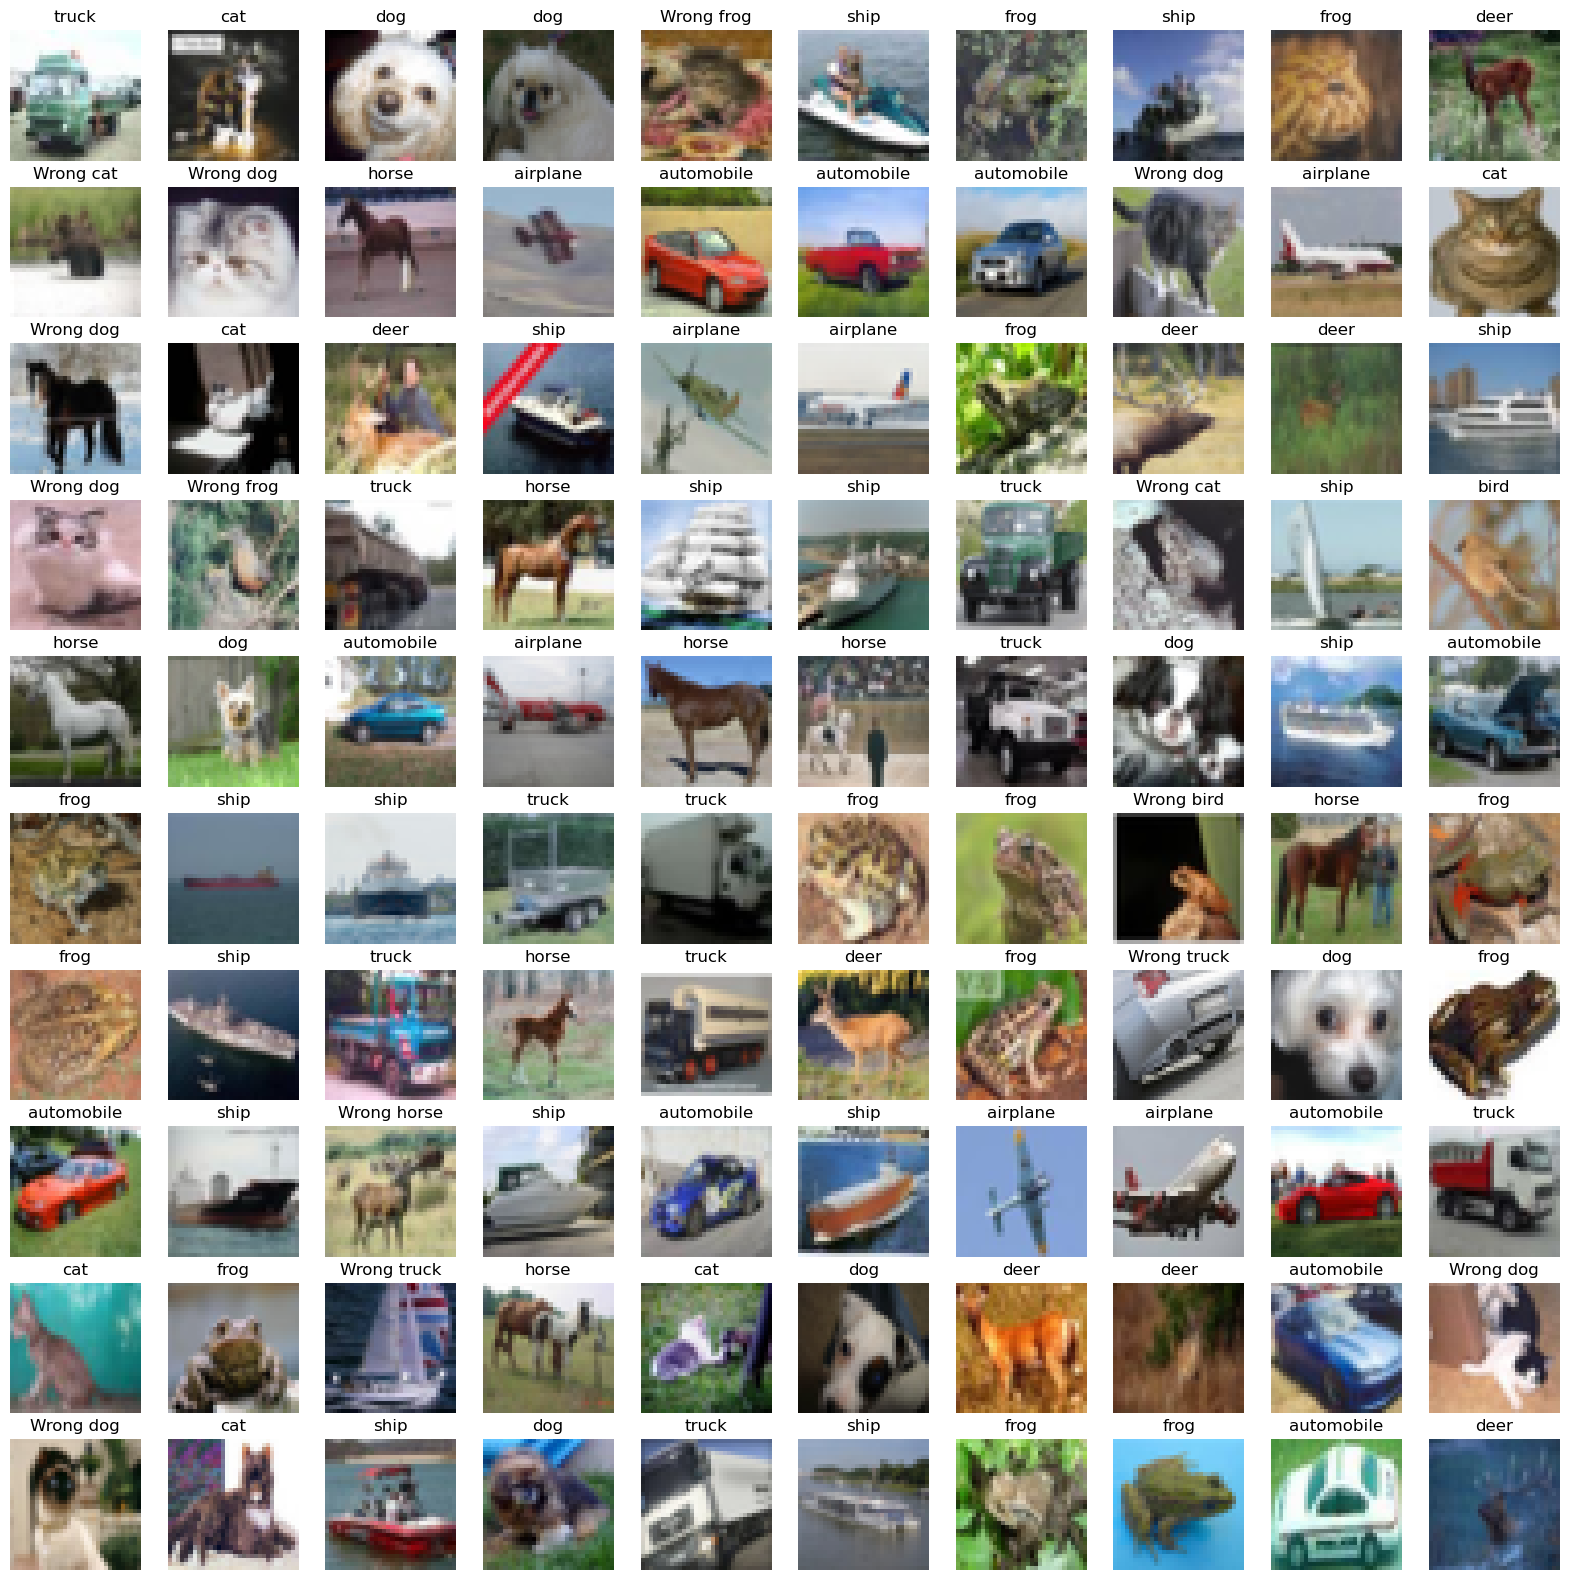

In [130]:
num_samples = test_x.shape[0]
random_indices = np.random.choice(num_samples, 100, replace=False)

X_sample = test_x[random_indices]
y_sample = test_y[random_indices]
predictions = []
correct_count = 0

plt.figure(figsize=( 20, 20))
for i in range(len(X_sample)):
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(X_sample[i])
    predictions.append(np.argmax(CIFAR10.predict(np.expand_dims(X_sample[i], axis=0), verbose=0)))
    if predictions[i] == np.argmax(y_sample[i]):
        correct_count += 1
        plt.title(classes[predictions[i]])
    else:
        plt.title("Wrong "+classes[predictions[i]])
    plt.axis("off")

print(f"Accuracy: {correct_count/len(X_sample)}")
plt.show()